# CNN

실습 환경

- ml.g4dn.xlarge
- Python 3.8
- TensorFlow 2.6
- PyTorch 1.12

## TensorFlow

In [12]:
import time
import random
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import datasets
from tensorflow.keras import layers, models

- 라이브러리 가져오기

In [6]:
mnist  = datasets.mnist

(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train, X_test = X_train / 255.0, X_test / 255.0

X_train = X_train.reshape((60000, 28, 28, 1))
X_test = X_test.reshape((10000, 28, 28, 1))

- mnist 손글씨 데이터셋 가져오기
- `255.0`으로 나눠준 이유는, 이미지가 0 ~ 255 사이의 값을 가지고 있어서, `MinMaxScale`을 적용한 것
  - `MinMaxScaler` : 정규화, 모든 값을 0 ~ 1 사이의 값으로 바꾸는 것.

In [7]:
model = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(5, 5), strides=(1, 1), padding='same', activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)),
    layers.Conv2D(filters=64, kernel_size=(2, 2), padding='same', activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Dropout(0.25),
    layers.Flatten(),
    layers.Dense(units=1000, activation='relu'),
    layers.Dense(units=10, activation='softmax')
])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        832       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 64)        8256      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
dropout (Dropout)            (None, 7, 7, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 3136)              0         
_________________________________________________________________
dense (Dense)                (None, 1000)              3

- 신경망 구성
- [`layers.Conv2D`](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Conv2D) 합성곱 수행
    - `filters` : output 공간의 차원, 즉 convolution의 output filter 개수
    - `kernel_size` : convolution filter를 3 X 3으로 할지, 5 X 5로 할지 정하는 것
    - `strides` : 몇 칸을 움직일 것인가
    - `padding` : `same` → padding을 줘서 원래 데이터의 크기와 맞춤, `valid` → padding 안줌
    - `activation` : 사용할 활성화 함수
    - `input_shape` : 모델의 첫 번째 레이어에서 설정해야 함.
- [`layers.MaxPooling2D`](https://www.tensorflow.org/api_docs/python/tf/keras/layers/MaxPool2D) 풀링을 수행해 데이터 크기를 줄임
    - `pool_size` : 최대값을 취할 윈도우 크기
    - `strides` : 몇 칸을 움직일 것인가
    - `padding` : padding을 얼마나 줄 것인가.
- [`layers.Dropout`](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Dropout) 0부터 1 사이의 확률로 뉴런 제거(drop), 과대적합(overfitting) 방지
    - `rate` : 드롭할 뉴런 단위의 비율
- [`layers.Flatten`](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Flatten) 2차원 데이터를 1차원 데이터로 바꾸는 역할
- [`layers.Dense`](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Dense) 이전 계층의 모든 뉴런과 결합된 형태의 layer (fully-connected layer)
    - `units` : output 공간의 차원
    - `activation` : 사용할 활성화 함수

In [8]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

start_time = time.time()

hist = model.fit(X_train, y_train, epochs=5, verbose=1, validation_data=(X_test, y_test))

print(f'Fit Time : {time.time() - start_time}')

Epoch 1/5
Extension horovod.torch has not been built: /usr/local/lib/python3.8/site-packages/horovod/torch/mpi_lib/_mpi_lib.cpython-38-x86_64-linux-gnu.so not found
If this is not expected, reinstall Horovod with HOROVOD_WITH_PYTORCH=1 to debug the build error.
Warning! MPI libs are missing, but python applications are still avaiable.
[2023-05-19 05:59:57.162 tensorflow-2-6-gpu--ml-g4dn-xlarge-7eba0e151157af0bd8a25c896f03:19 INFO utils.py:27] RULE_JOB_STOP_SIGNAL_FILENAME: None
[2023-05-19 05:59:57.188 tensorflow-2-6-gpu--ml-g4dn-xlarge-7eba0e151157af0bd8a25c896f03:19 INFO profiler_config_parser.py:111] Unable to find config at /opt/ml/input/config/profilerconfig.json. Profiler is disabled.
1875/1875 [==============================] - 8s 3ms/step - loss: 0.1206 - accuracy: 0.9627 - val_loss: 0.0401 - val_accuracy: 0.9863
Epoch 2/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0437 - accuracy: 0.9864 - val_loss: 0.0306 - val_accuracy: 0.9902
Epoch 3/5
1875/1875 [===

- 모델 훈련
- [`models.compile()`](https://www.tensorflow.org/api_docs/python/tf/keras/Model#compile) 손실 및 메트릭으로 모델 구성
    - `optimizer` : 모델을 학습할 때 데이터의 실제 결과와 모델이 예측한 결과를 기반으로 잘 줄일 수 있게 만들어주는 역할
    - `loss` : 손실 함수, 학습 중에 알고리즘이 얼마나 잘못 예측하는 정도를 확인하기 위한 함수, 최적화(Optimization)를 위해 최소화하는 것이 목적인 함수
    - `metrics` : 학습 및 테스트 중에 모델에서 평가할 메트릭 목록, 일반적으로 `accurary` (정확도) 사용
- [`models.fit()`](https://www.tensorflow.org/api_docs/python/tf/keras/Model#fit) 모델 훈련
    - `epochs` : 훈련을 시킬 횟수
    - `verbose` : 진행률 표시줄을 보일 것인지
    - `validation_data` : 모델 측정항목, 학습에는 들어가지 않음

In [9]:
predicted_result = model.predict(X_test)
predicted_labels = np.argmax(predicted_result,  axis=1)
predicted_labels[:10]

array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9])

- 예측한 값 가져오기
- [`models.predict()`](https://www.tensorflow.org/api_docs/python/tf/keras/Model#predict)

In [11]:
wrong_result = []
for n in range(0, len(y_test)):
    if predicted_labels[n] != y_test[n]:
        wrong_result.append(n)
        
len(wrong_result)

106

- 틀린 데이터 모으기 - 10000개 데이터 중 106개를 틀림

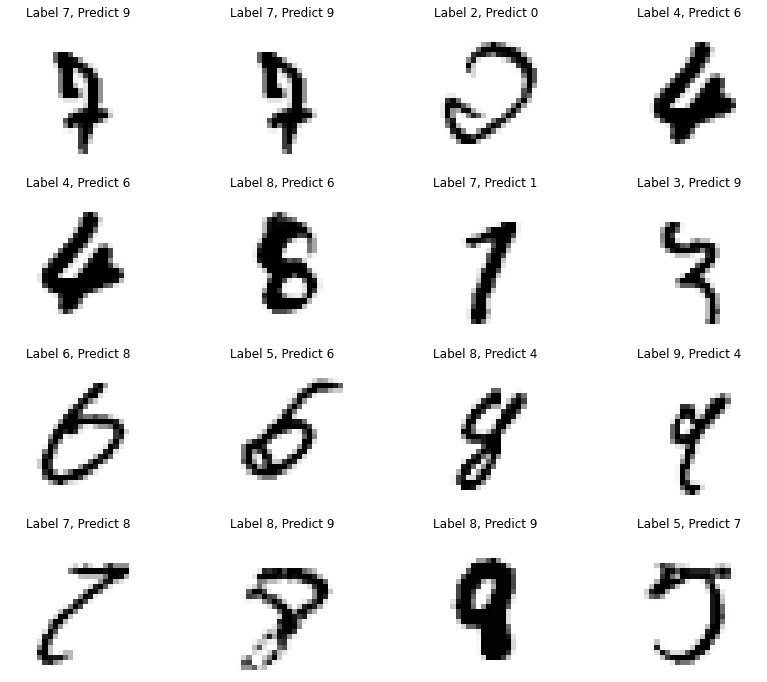

In [13]:
samples = random.choices(population=wrong_result, k =16)

plt.figure(figsize=(14, 12))

for idx, n in enumerate(samples):
    plt.subplot(4, 4, idx + 1)
    plt.imshow(X_test[n].reshape(28,28), cmap = 'Greys', interpolation='nearest')
    plt.title('Label ' + str(y_test[n]) + ', Predict ' + str(predicted_labels[n]))
    plt.axis('off')
    
plt.show()

- 틀린 데이터 16개만 직접 그려보기 - 직접 봐도 틀릴만한 것들

## PyTorch

In [3]:
import torch
import torchvision.datasets as dsets
import torchvision.transforms as transforms
import torch.nn.init

/opt/conda/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


- 패키지 가져오기

In [4]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

# 랜덤 시드 고정
torch.manual_seed(777)

# GPU 사용 가능일 경우 랜덤 시드 고정
if device == 'cuda':
    torch.cuda.manual_seed_all(777)

- GPU 사용이 가능하면 GPU 사용

In [5]:
learning_rate = 0.001
training_epochs = 15
batch_size = 100

- 학습에 사용할 하이퍼파라미터 설정

In [6]:
mnist_train = dsets.MNIST(root='MNIST_data/', # 다운로드 경로 지정
                          train=True, # True를 지정하면 훈련 데이터로 다운로드
                          transform=transforms.ToTensor(), # 텐서로 변환
                          download=True)

mnist_test = dsets.MNIST(root='MNIST_data/', # 다운로드 경로 지정
                         train=False, # False를 지정하면 테스트 데이터로 다운로드
                         transform=transforms.ToTensor(), # 텐서로 변환
                         download=True)

- 데이터로더로 다루기 위해 데이터셋 정의

In [7]:
data_loader = torch.utils.data.DataLoader(dataset=mnist_train,
                                          batch_size=batch_size,
                                          shuffle=True,
                                          drop_last=True)

- 데이터로더를 사용해 배치 크기 지정

In [8]:
class CNN(torch.nn.Module):

    def __init__(self):
        super(CNN, self).__init__()
        self.keep_prob = 0.5
        # L1 ImgIn shape=(?, 28, 28, 1)
        #    Conv     -> (?, 28, 28, 32)
        #    Pool     -> (?, 14, 14, 32)
        self.layer1 = torch.nn.Sequential(
            torch.nn.Conv2d(1, 32, kernel_size=3, stride=1, padding=1),
            torch.nn.ReLU(),
            torch.nn.MaxPool2d(kernel_size=2, stride=2))
        # L2 ImgIn shape=(?, 14, 14, 32)
        #    Conv      ->(?, 14, 14, 64)
        #    Pool      ->(?, 7, 7, 64)
        self.layer2 = torch.nn.Sequential(
            torch.nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1),
            torch.nn.ReLU(),
            torch.nn.MaxPool2d(kernel_size=2, stride=2))
        # L3 ImgIn shape=(?, 7, 7, 64)
        #    Conv      ->(?, 7, 7, 128)
        #    Pool      ->(?, 4, 4, 128)
        self.layer3 = torch.nn.Sequential(
            torch.nn.Conv2d(64, 128, kernel_size=3, stride=1, padding=1),
            torch.nn.ReLU(),
            torch.nn.MaxPool2d(kernel_size=2, stride=2, padding=1))

        # L4 FC 4x4x128 inputs -> 625 outputs
        self.fc1 = torch.nn.Linear(4 * 4 * 128, 625, bias=True)
        torch.nn.init.xavier_uniform_(self.fc1.weight)
        self.layer4 = torch.nn.Sequential(
            self.fc1,
            torch.nn.ReLU(),
            torch.nn.Dropout(p=1 - self.keep_prob))
        # L5 Final FC 625 inputs -> 10 outputs
        self.fc2 = torch.nn.Linear(625, 10, bias=True)
        torch.nn.init.xavier_uniform_(self.fc2.weight)

    def forward(self, x):
        out = self.layer1(x)
        out = self.layer2(out)
        out = self.layer3(out)
        out = out.view(out.size(0), -1)   # Flatten them for FC
        out = self.layer4(out)
        out = self.fc2(out)
        return out

- CNN 모델 설계

In [9]:
# CNN 모델 정의
model = CNN().to(device)

- 모델 정의

In [10]:
criterion = torch.nn.CrossEntropyLoss().to(device)    # 비용 함수에 소프트맥스 함수 포함되어져 있음.
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

- 비용 함수와 옵티마이저 정의

In [11]:
total_batch = len(data_loader)
print('총 배치의 수 : {}'.format(total_batch))

총 배치의 수 : 600


In [12]:
for epoch in range(training_epochs):
    avg_cost = 0

    for X, Y in data_loader: # 미니 배치 단위로 꺼내온다. X는 미니 배치, Y느 ㄴ레이블.
        # image is already size of (28x28), no reshape
        # label is not one-hot encoded
        X = X.to(device)
        Y = Y.to(device)

        optimizer.zero_grad()
        hypothesis = model(X)
        cost = criterion(hypothesis, Y)
        cost.backward()
        optimizer.step()

        avg_cost += cost / total_batch

    print('[Epoch: {:>4}] cost = {:>.9}'.format(epoch + 1, avg_cost))

[2023-05-19 06:21:48.458 pytorch-1-12-gpu-py-ml-g4dn-xlarge-4d5aaf9e9e3be371aa64cb3b07f5:24 INFO utils.py:28] RULE_JOB_STOP_SIGNAL_FILENAME: None


/opt/conda/lib/python3.8/site-packages/smdebug-1.0.24b20230214-py3.8.egg/smdebug/profiler/system_metrics_reader.py:78: SyntaxWarning: "is not" with a literal. Did you mean "!="?
/opt/conda/lib/python3.8/site-packages/smdebug-1.0.24b20230214-py3.8.egg/smdebug/profiler/system_metrics_reader.py:78: SyntaxWarning: "is not" with a literal. Did you mean "!="?


[2023-05-19 06:21:49.394 pytorch-1-12-gpu-py-ml-g4dn-xlarge-4d5aaf9e9e3be371aa64cb3b07f5:24 INFO profiler_config_parser.py:111] Unable to find config at /opt/ml/input/config/profilerconfig.json. Profiler is disabled.
[Epoch:    1] cost = 0.192203909
[Epoch:    2] cost = 0.0528860949
[Epoch:    3] cost = 0.0374084339
[Epoch:    4] cost = 0.029804999
[Epoch:    5] cost = 0.0238719769
[Epoch:    6] cost = 0.0210989136
[Epoch:    7] cost = 0.0178434663
[Epoch:    8] cost = 0.0147685334
[Epoch:    9] cost = 0.0140574556
[Epoch:   10] cost = 0.0120229032
[Epoch:   11] cost = 0.0110315885
[Epoch:   12] cost = 0.00917940587
[Epoch:   13] cost = 0.00880746823
[Epoch:   14] cost = 0.00717730308
[Epoch:   15] cost = 0.00889088679


- 총 배치의 수 600, 배치 크기가 100이므로 훈련 데이터는 60,000개

In [13]:
# 학습을 진행하지 않을 것이므로 torch.no_grad()
with torch.no_grad():
    X_test = mnist_test.test_data.view(len(mnist_test), 1, 28, 28).float().to(device)
    Y_test = mnist_test.test_labels.to(device)

    prediction = model(X_test)
    correct_prediction = torch.argmax(prediction, 1) == Y_test
    accuracy = correct_prediction.float().mean()
    print('Accuracy:', accuracy.item())

Accuracy: 0.9779999852180481


/opt/conda/lib/python3.8/site-packages/torchvision/datasets/mnist.py:80: UserWarning: test_data has been renamed data
  warnings.warn("test_data has been renamed data")
/opt/conda/lib/python3.8/site-packages/torchvision/datasets/mnist.py:70: UserWarning: test_labels has been renamed targets
  warnings.warn("test_labels has been renamed targets")


- 테스트 진행 - 정확도 97.7%